In [1]:
import pandas as pd
import glob
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import pacf

In [2]:
from pmdarima.arima import auto_arima

In [3]:
import pmdarima as pm

In [4]:
data = pd.read_excel('consumo_energia_industrial_mg.xlsx')
data.shape

(117, 5)

In [5]:
data.head()

,Time,UF,Descrição,Setor,Consumo_MWh
0,2013-1-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2429892.0
1,2013-2-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2392524.0
2,2013-3-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2398782.0
3,2013-4-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2542895.0
4,2013-5-1,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2523754.0


In [6]:
data['Time'] = pd.to_datetime(data['Time'].str.strip(), format='%Y-%m-%d')

In [7]:
data['Consumo_MWh'] = data['Consumo_MWh'] / 1000

In [8]:
data.dtypes

Time           datetime64[ns]
UF                     object
Descrição              object
Setor                  object
Consumo_MWh           float64
dtype: object

In [9]:
data.head()

,Time,UF,Descrição,Setor,Consumo_MWh
0,2013-01-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2429.892
1,2013-02-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2392.524
2,2013-03-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2398.782
3,2013-04-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2542.895
4,2013-05-01,Minas Gerais,Consumo de energia elétrica na rede (MWh),Industrial,2523.754


In [10]:
data.columns

Index(['Time', 'UF', 'Descrição', 'Setor', 'Consumo_MWh'], dtype='object')

In [11]:
data = data[['Time', 'Consumo_MWh']]

In [12]:
data.head()

,Time,Consumo_MWh
0,2013-01-01,2429.892
1,2013-02-01,2392.524
2,2013-03-01,2398.782
3,2013-04-01,2542.895
4,2013-05-01,2523.754


In [13]:
data.tail()

,Time,Consumo_MWh
112,2022-05-01,2826.89462
113,2022-06-01,2560.89226
114,2022-07-01,2629.56443
115,2022-08-01,2734.19473
116,2022-09-01,2528.52568


In [14]:
data.dtypes

Time           datetime64[ns]
Consumo_MWh           float64
dtype: object

In [15]:
data24 = data[(data['Time'] > '2020-09-01')]
data12 = data[(data['Time'] > '2021-09-01')]
data6 = data[(data['Time'] > '2022-03-01')]

In [16]:
data24 = data24.set_index(['Time'])
data12 = data12.set_index(['Time'])
data6 = data6.set_index(['Time'])

In [17]:
data24.head()

,Consumo_MWh
Time,
2020-10-01,2728.95042
2020-11-01,2611.13640
2020-12-01,2625.10557
2021-01-01,2725.74494
2021-02-01,2553.74788


In [18]:
data24.tail()

,Consumo_MWh
Time,
2022-05-01,2826.89462
2022-06-01,2560.89226
2022-07-01,2629.56443
2022-08-01,2734.19473
2022-09-01,2528.52568


<Axes: xlabel='Time'>

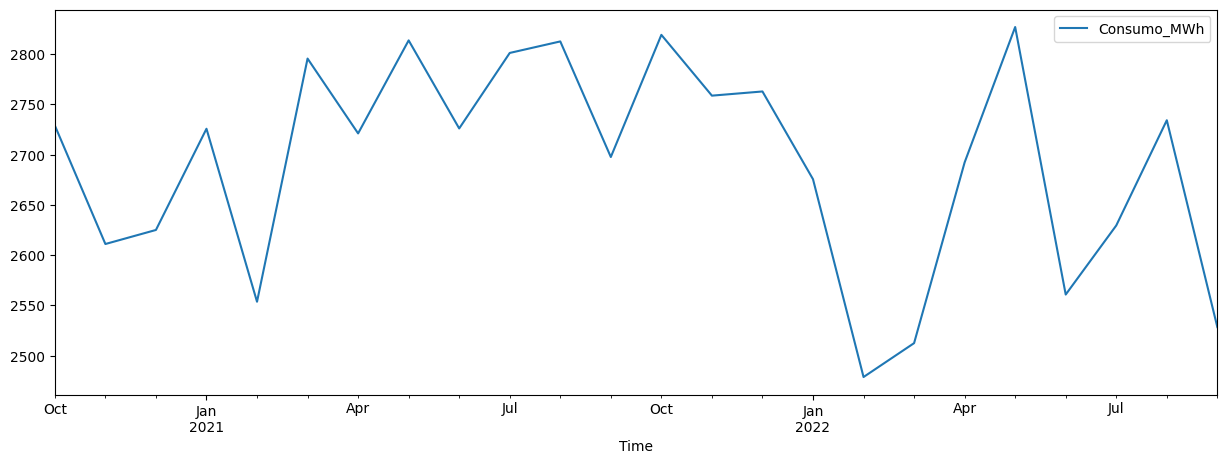

In [19]:
data24.plot(figsize=(15,5))

In [20]:
TEST_SIZE = 1
train, test = data24.iloc[:-TEST_SIZE], data24.iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], data24.shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape

((23, 1), (23,), (1, 1), (1,))

In [21]:
train.tail()

,Consumo_MWh
Time,
2022-04-01,2692.27648
2022-05-01,2826.89462
2022-06-01,2560.89226
2022-07-01,2629.56443
2022-08-01,2734.19473


In [22]:
test

,Consumo_MWh
Time,
2022-09-01,2528.52568


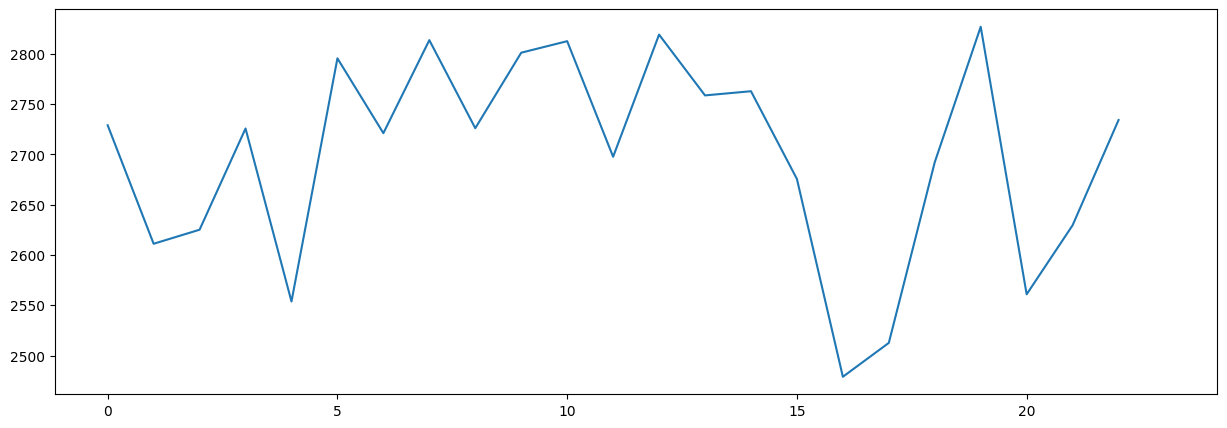

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [24]:
#model = auto_arima(train, start_p=1, start_q=1,
model = auto_arima(data24, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=293.619, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=291.536, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=287.518, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=291.720, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=285.659, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=287.488, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=287.496, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=289.596, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.568 seconds


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -140.830
Date:                Tue, 11 Jun 2024   AIC                            285.659
Time:                        14:46:56   BIC                            287.930
Sample:                    10-01-2020   HQIC                           286.231
                         - 09-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7317      0.167     -4.392      0.000      -1.058      -0.405
sigma2      1.187e+04   3925.099      3.024      0.002    4175.565    1.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.84   Prob(JB):                         0.72
Heteroskedasticity (H):               2.63   Skew:                            -0.34
Prob(H) (two-sided):                  0.19   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
# Forecast

prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

2022-10-01    2634.188501
Freq: MS, dtype: float64

In [27]:
data24.tail()

,Consumo_MWh
Time,
2022-05-01,2826.89462
2022-06-01,2560.89226
2022-07-01,2629.56443
2022-08-01,2734.19473
2022-09-01,2528.52568


In [28]:
prediction2, confint2 = model.predict(n_periods=12, return_conf_int=True)

prediction2

2022-10-01    2634.188501
2022-11-01    2634.188501
2022-12-01    2634.188501
2023-01-01    2634.188501
2023-02-01    2634.188501
2023-03-01    2634.188501
2023-04-01    2634.188501
2023-05-01    2634.188501
2023-06-01    2634.188501
2023-07-01    2634.188501
2023-08-01    2634.188501
2023-09-01    2634.188501
Freq: MS, dtype: float64

In [29]:
prediction2.sum()

31610.26201765308

In [30]:
(2672.936573436433 - 2528.52568) / 2528.52568

0.05711268609161707

In [31]:
cf= pd.DataFrame(confint)

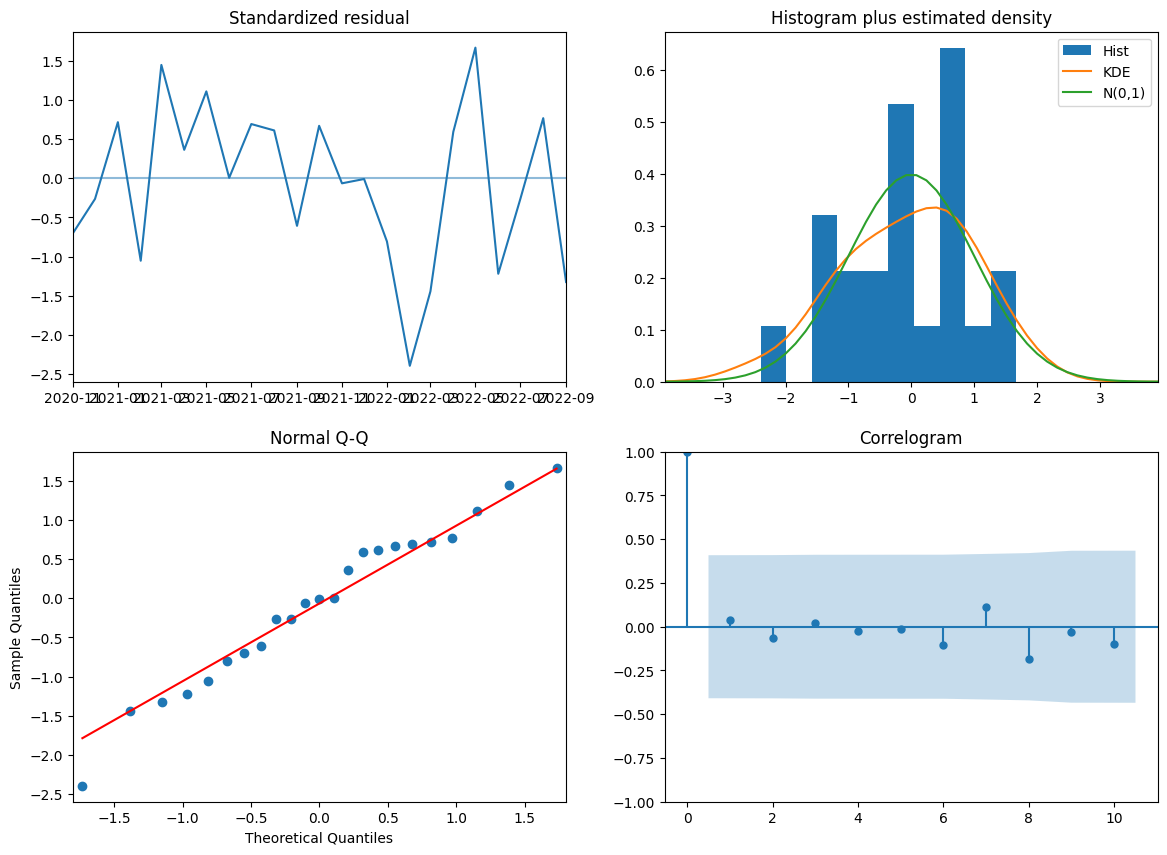

In [32]:
model.plot_diagnostics(figsize=(14,10))
plt.show()

In [33]:
def calcsmape(actual, forecast):
    return 1/len(actual) * np.sum(2 * np.abs(forecast-actual) / (np.abs(actual) + np.abs(forecast)))

In [34]:
smape = calcsmape(test.Consumo_MWh, prediction)
smape

0.0

In [35]:
TEST_SIZE12 = 1
train12, test12 = data12.iloc[:-TEST_SIZE12], data12.iloc[-TEST_SIZE12:]
x_train12, x_test12 = np.array(range(train12.shape[0])), np.array(range(train12.shape[0], data12.shape[0]))
train12.shape, x_train12.shape, test12.shape, x_test12.shape

((11, 1), (11,), (1, 1), (1,))

In [36]:
test12.head()

,Consumo_MWh
Time,
2022-09-01,2528.52568


In [37]:
test12['Consumo_MWh'].sum()

2528.52568

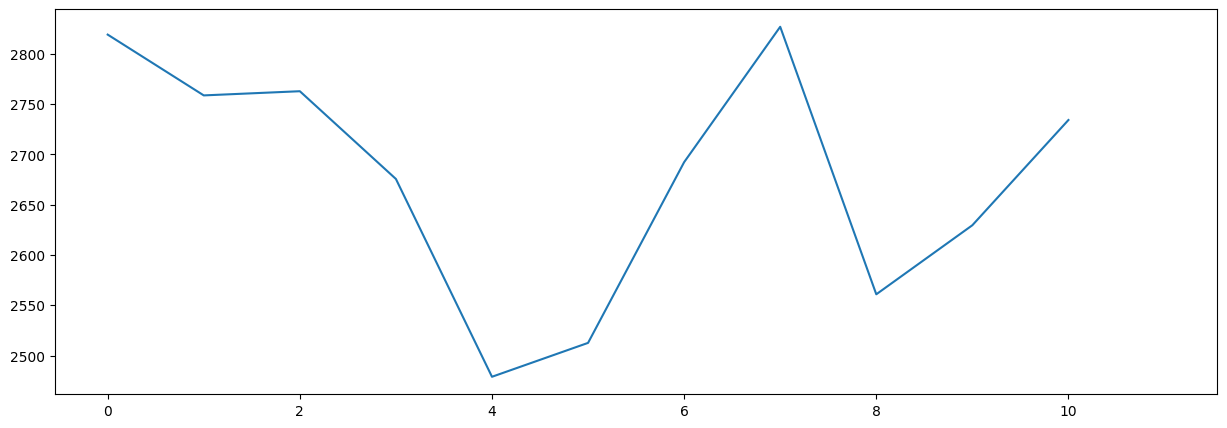

In [38]:
fig12, ax12 = plt.subplots(1, 1, figsize=(15, 5))
ax12.plot(x_train12, train12)
ax12.plot(x_test12, test12)

In [39]:
model12 = auto_arima(train12, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=130.753, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=132.722, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=128.791, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.105 seconds


In [40]:
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   11
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -63.396
Date:                Tue, 11 Jun 2024   AIC                            128.791
Time:                        14:47:24   BIC                            129.094
Sample:                    10-01-2021   HQIC                           128.460
                         - 08-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.878e+04   1.04e+04      1.797      0.072   -1698.220    3.93e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.88   Prob(JB):                         0.70
Heteroskedasticity (H):               7.66   Skew:                            -0.50
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
prediction12, confint12 = model12.predict(n_periods=TEST_SIZE12, return_conf_int=True)

prediction12

2022-09-01    2734.19473
Freq: MS, dtype: float64

In [42]:
prediction12.sum()

2734.1947299999997

In [43]:
((2734194.7299999995 - 2528525.68) / 2528525.68) * 100

8.1339514020676

In [44]:
cf12= pd.DataFrame(confint12)

In [45]:
cf12.head()

,0,1
0,2465.613944,3002.775516


In [46]:
cf12.tail()

,0,1
0,2465.613944,3002.775516


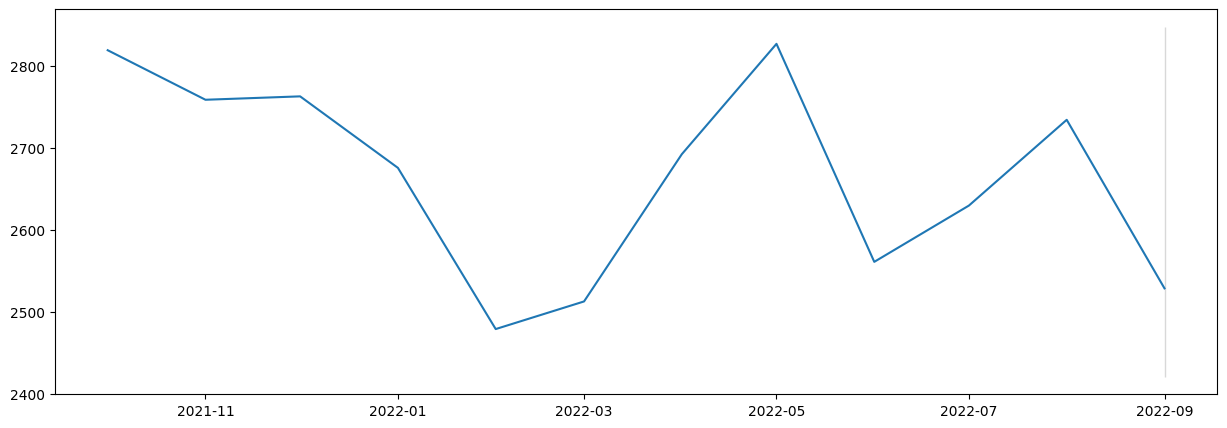

In [47]:
prediction_series12 = pd.Series(prediction12,index=test12.index)
fig12, ax12 = plt.subplots(1, 1, figsize=(15, 5))
ax12.plot(data12.Consumo_MWh)
ax12.plot(prediction_series12)
ax12.fill_between(prediction_series12.index,
                cf[0],
                cf[1],color='grey',alpha=.3)

In [49]:
smape=calcsmape(test12.Consumo_MWh, prediction12)
smape

0.07816073588450408

In [50]:
TEST_SIZE6 = 1
train6, test6 = data6.iloc[:-TEST_SIZE6], data6.iloc[-TEST_SIZE6:]
x_train6, x_test6 = np.array(range(train6.shape[0])), np.array(range(train6.shape[0], data6.shape[0]))
train6.shape, x_train6.shape, test6.shape, x_test6.shape

((5, 1), (5,), (1, 1), (1,))

In [51]:
train6

,Consumo_MWh
Time,
2022-04-01,2692.27648
2022-05-01,2826.89462
2022-06-01,2560.89226
2022-07-01,2629.56443
2022-08-01,2734.19473


In [52]:
test

,Consumo_MWh
Time,
2022-09-01,2528.52568


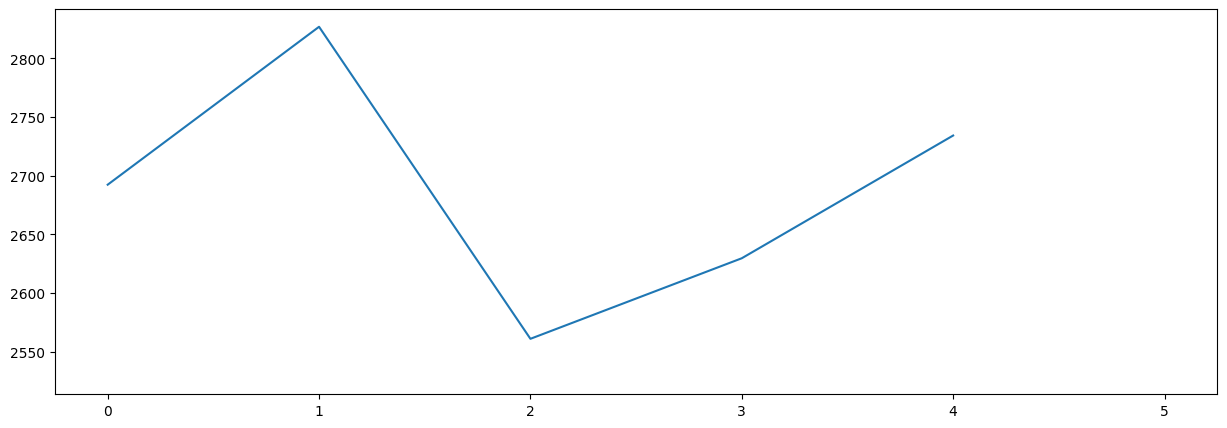

In [53]:
fig6, ax6 = plt.subplots(1, 1, figsize=(15, 5))
ax6.plot(x_train6, train6)
ax6.plot(x_test6, test6)

In [54]:
model6 = auto_arima(train6, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=False,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=56.019, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=57.398, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=54.036, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.125 seconds


In [55]:
prediction6, confint6 = model6.predict(n_periods=TEST_SIZE6, return_conf_int=True)

prediction

2022-10-01    2634.188501
Freq: MS, dtype: float64

In [56]:
prediction6.sum()

2734.1947299999997

In [57]:
test6

,Consumo_MWh
Time,
2022-09-01,2528.52568


In [58]:
((2734194.7299999995 - 2528525.68) / 2528525.68) * 100

8.1339514020676

In [59]:
data24.head(), data24.tail(), data24.shape

(            Consumo_MWh
 Time                   
 2020-10-01   2728.95042
 2020-11-01   2611.13640
 2020-12-01   2625.10557
 2021-01-01   2725.74494
 2021-02-01   2553.74788,
             Consumo_MWh
 Time                   
 2022-05-01   2826.89462
 2022-06-01   2560.89226
 2022-07-01   2629.56443
 2022-08-01   2734.19473
 2022-09-01   2528.52568,
 (24, 1))

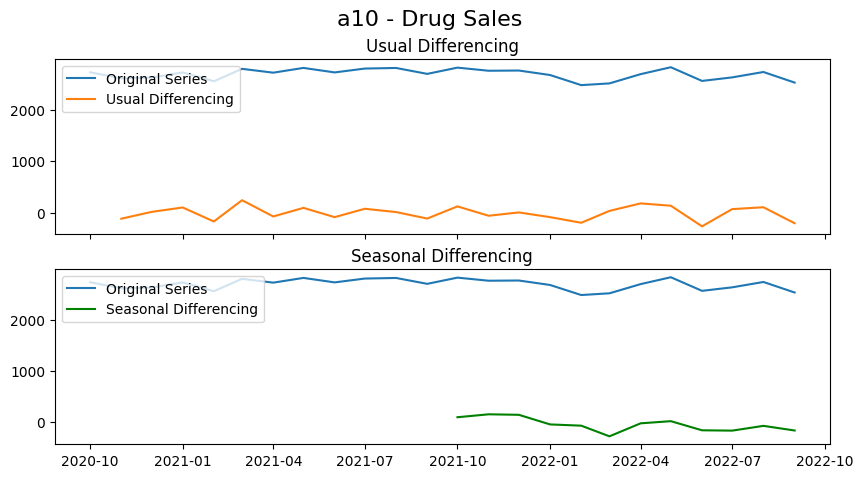

In [60]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data24[:], label='Original Series')
axes[0].plot(data24[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data24[:], label='Original Series')
axes[1].plot(data24[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [61]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data24, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, 
                         max_q=3, 
                         m=1,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=301.174, Time=0.00 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=294.411, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=290.026, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=289.253, Time=0.06 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=291.233, Time=0.08 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.358 seconds


In [62]:
# Forecast
n_periods = 6
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data24.index[-1], periods = n_periods, freq='MS')

In [63]:
data24.index[-1]

Timestamp('2022-09-01 00:00:00')

In [64]:
fitted

2022-10-01    2494.432305
2022-11-01    2524.877606
2022-12-01    2460.549661
2023-01-01    2377.898773
2023-02-01    2369.436469
2023-03-01    2333.607863
Freq: MS, dtype: float64

In [65]:
confint

array([[2218.70522691, 2770.15938311],
       [2145.4099686 , 2904.34524427],
       [1962.76601524, 2958.33330604],
       [1712.11332602, 3043.68421908],
       [1508.58224497, 3230.29069392],
       [1290.51809127, 3376.69763388]])

In [66]:
index_of_fc

DatetimeIndex(['2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01'],
              dtype='datetime64[ns]', freq='MS')

In [67]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

In [68]:
lower_series

2022-09-01    2218.705227
2022-10-01    2145.409969
2022-11-01    1962.766015
2022-12-01    1712.113326
2023-01-01    1508.582245
2023-02-01    1290.518091
Freq: MS, dtype: float64

In [69]:
fitted_series

2022-09-01            NaN
2022-10-01    2494.432305
2022-11-01    2524.877606
2022-12-01    2460.549661
2023-01-01    2377.898773
2023-02-01    2369.436469
Freq: MS, dtype: float64

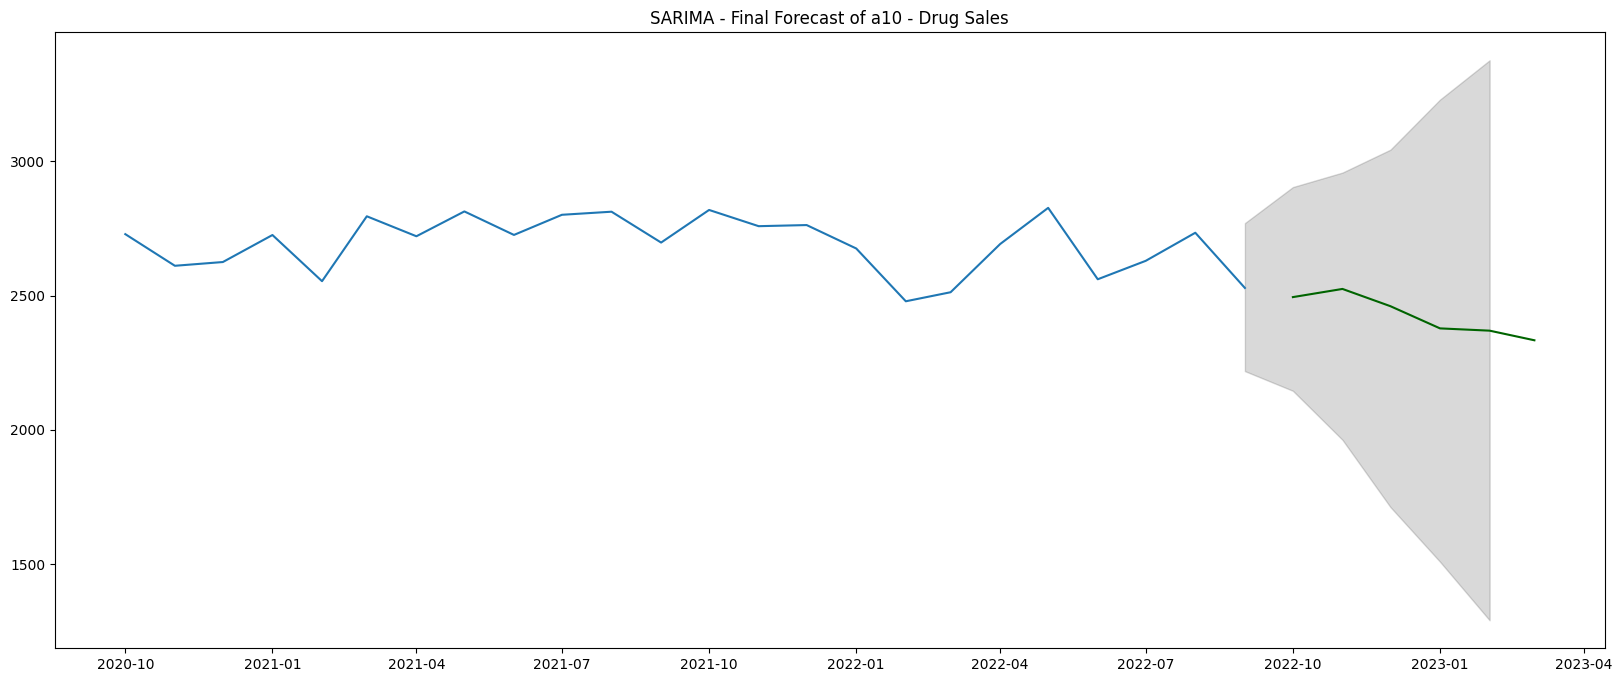

In [70]:
# Plot
plt.figure(figsize=(20, 8))
plt.plot(data24)
plt.plot(fitted, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [71]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

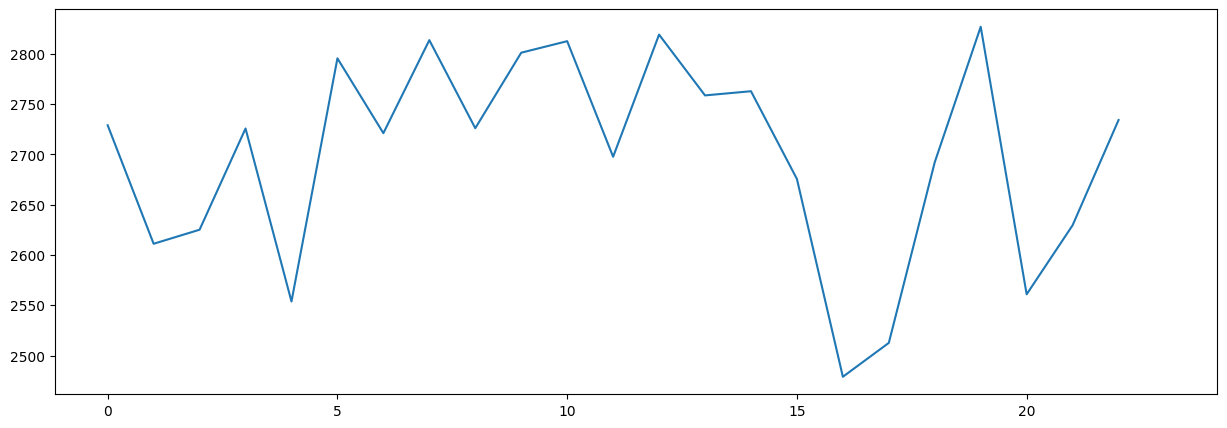

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [73]:
model24b = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model24b.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=287.973, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=281.132, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=282.019, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=282.002, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=430.722, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=284.156, Time=0.03 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.291 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [74]:
forecast24b = model24b.predict(n_periods=len(test))
forecast24b = pd.DataFrame(forecast24b, index = test.index,columns=['Prediction'])

In [75]:
forecast24b

,Prediction
Time,
2022-09-01,2698.423141


In [76]:
test

,Consumo_MWh
Time,
2022-09-01,2528.52568


In [77]:
((2698.423141 - 2528.52568) / 2528.52568) * 100

6.7192301958349105

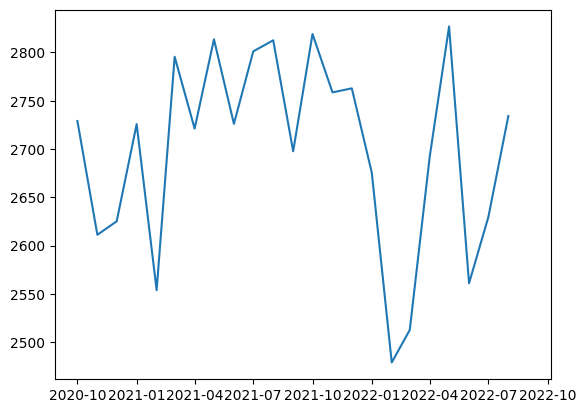

In [78]:
#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Valid')
plt.plot(forecast24b, label='Prediction')
plt.show()

In [79]:
rms = sqrt(mean_squared_error(test, forecast24b))
print(rms)

169.89746086956484
